<center><img src="img/quest/aml-logo.png" width="600"/>

***

<center>Lecture 7</center>

***

<center>Non-linear Models <br>(Decision Trees, Random Forests, Ensemble)</center>

***

<center>17 March 2025<center>
<center>Rahman Peimankar<center>

# Agenda

* Decision tree --> General idea
* Decision trees workflow & jargons
* Automatic Feature Selection Using Decison Tree
* Missing Data in Decison Trees
* Regression Trees
* sklearn implementation of decision trees
* Random forests
* Random forests tuning

# Recap of Last Week

<div>
<center>
<img src="img/quest/image-1-lecture6.jpg" width="700"/>
</div>

<center>$\hat y = sign(w^T\mathbf{x} + b) = sign(\sum_{i=1} w_i x_i + b)$

# Logistic Regression

<div>
<table><tr>
<td><img src="img/quest/Qimage-3-lecture6.jpg" width="600"/></td>
<td>

* Logistic regression is similar to linear regression, except...
* Logistic regression predicts whether something is **True** or **False**, instead of predicting something continuous like **size**.
* Also, instead of fitting a line to the data, logistic regression fits an $S$ shaped "logistic function".
* This curve goes from 0 to 1. This means that the curve tells you the probability as well.
    
    
</td>
</tr></table>

# Support Vector Machines

<div>
<center>
<table><tr>
<td><img src="img/quest/Qimage-17-lecture6.jpg" width="800"/></td>
<td>   

* The shortest distance between the observations and the threshold is called the **margin**.
* When the threshold is halfway between the two observations, the **margin** is as large as it can be.
* This is alled **Maximum Margin Classifier** 
    
    
</td>
</tr></table>

<div>
<center>
<table><tr>
<td><img src="img/quest/Qimage-21-lecture6.jpg" width="800"/></td>
<td>   

* If we put thethreshold halfway between these two observations,
* Then we will misclassify the <font color='red'>not obese<font color='black'>observation close to the <font color='green'>obese <font color='black'>observaions.
</td>
</tr></table>

<div>

<table><tr>
<td><img src="img/quest/Qimage-24-lecture6.jpg" width="800"/></td>
<td><img src="img/quest/Qimage-25-lecture6.jpg" width="800"/></td>
</tr></table>
    
* What if the data is **2-Dimensional**?
* Then a **Support Vector Classifier** is a line.

# Kernel SVMs

<center>$\hat y = sign(\sum_{i}^{n}\alpha_i(\mathbf{x}_i^T\mathbf{x})) \longrightarrow \hat y = sign(\sum_{i}^{n}\alpha_i(\phi(\mathbf{x}_i)^T\phi(\mathbf{x})))$<br>
    
***
    
<center>$\phi(\mathbf{x}_i)^T\phi(\mathbf{x}) \longrightarrow k(\mathbf{x}_i,\mathbf{x}_j)$

<center>$k_{linear}(\mathbf{x},\mathbf{x'}) = \mathbf{x}^T\mathbf{x'}$<br>
    
***
    
<center>$k_{poly}(\mathbf{x},\mathbf{x'}) = (\mathbf{x}^T\mathbf{x'} + c)^d$<br>
    
***
    
<center>$k_{rbf}(\mathbf{x},\mathbf{x'}) = exp(\gamma||\mathbf{x}^T - \mathbf{x'}||^2)$<br>
    
***
    
<center>$k_{sigmoid}(\mathbf{x},\mathbf{x'}) = tanh(\gamma\mathbf{x}^T\mathbf{x'} + r)$<br>

    
If $k$ and $k'$ are kernels, so are $k + k', kk', ck'$

<div>
<center>
<img src="img/quest/image-16-lecture6.jpg" width="1200"/>
</div>

# Decision Tree
Here is a simple decision tree.
<div>
<center>
<img src="img/quest/Qimage-1.png" width="550"/>
</div> 

* In general, a decision tree asks a question.
* And then classifies the person based on the answer.
* The above decision tree is based on a yes/no question.

This decision tree is based on **ranked** data, where 1 is super hungry and 2 is moderately hungry
<div>
<center>
<img src="img/quest/Qimage-2.jpg" width="950"/>
</div>

The classification can also be numeric.
<div>
<center>
<img src="img/quest/Qimage-3.png" width="550"/>
</div>

* Here is a more complicated decision tree!
* It combines numeric data with yes/no data.
<div>
<center>
<img src="img/quest/Qimage-4.jpg" width="850"/>
</div>
    
* Notice that the cutoff for resting heart rate is not always the same. In this case 100bpm on the left side and 120bpm on the right side.
* An the order of the questions on both sides does not have to be the same!
* Lastly the final classification can be repeated!

# Decision Trees Workflow 

1. You start at the top 
2. And work your way down
3. Until you get to a point where you can't go any further, and thats how you'll classify a sample!
    

# Decision Trees Jargons

<div>
<center>
<table><tr>
<td>
    
The very top of the tree is called the **Root Node** or just **The Root**
    
<img src="img/quest/Qimage-5.jpg" width="400"/>
    
</td>
<td>
    
These are called **Internal Nodes**, or just **Nodes**.
    
<img src="img/quest/Qimage-6.jpg" width="400"/>
    
</td>
</tr></table>


<div>
<center>
<table><tr>
<td>
    
**Internal Nodes** have arrows pointing to them ...
    
<img src="img/quest/Qimage-7.jpg" width="500"/>
    
</td>
<td>
    
And they have arrow pointing away fom them.
    
<img src="img/quest/Qimage-8.jpg" width="500"/>
    
</td>
</tr></table>

* Lastly, these are called **Leaf Nodes**, or just **Leaves**.
* **Leaf Nodes** have arrows pointing to them. But there are no arrows pointing away from them.
<div>
<center>
<img src="img/quest/Qimage-9.jpg" width="950"/>
</div>



# From a Raw Table of Data to a Decision Tree

Here, we want to create a tree that uses **chest pain**, **good blood circulation** and **blocked artery status** to predict whether or not a patient has **heart disease**.

<div>
<center>
<img src="img/quest/Qimage-11.jpg" width="1050"/>
</div>

<font color='black'> The first thing we want to know is whether **chest pain**, **good blood circulation** and **blocked artery status** should be at the very top of our tree. (<font color='red'> **The Root Node**<font color='black'>)

Let's assume that we have 303 patients in this study. 

<div>
<center>
<table><tr>
<td>
    
We start by looking at how well **Chest Pain** alone predicts heart disease...
    
<img src="img/quest/Qimage-12.jpg" width="500"/>
    
</td>
<td>
    
Here is  little tree that only takes chest pain into account.
    
<img src="img/quest/Qimage-13.jpg" width="500"/>
    
</td>
</tr></table>

Now we do the exact same thing for **good blood circulation**.
    
<div>
<center>
<table><tr>
<td>
        
<img src="img/quest/Qimage-14.jpg" width="500"/>
    
</td>
<td>
    
<img src="img/quest/Qimage-15.jpg" width="500"/>
    
</td>
</tr></table>

Lastly, we look at how **Blocked Arteries** separates the patients with and without heart disease.
    
    
<div>
<center>
<table><tr>
<td>
        
* Since we don't know if this patient had blocked arteries or not, we will skip it.
* However, there are alternatives that we will discuss them later on.
    
<img src="img/quest/Qimage-16.jpg" width="500"/>
    
</td>
<td>
    
<img src="img/quest/Qimage-17.jpg" width="500"/>
    
</td>
</tr></table>

# Specify the Root Node

* None of the **Chest Pain**, **Good Blood Ciculation**, and **Block Arteries** did do a perfect job.
    
<div>
<center>
<img src="img/quest/Qimage-18.jpg" width="400"/>
</div>

Because <font color='red'>none <font color='black'>of the leaf nodes are <font color='red'>100% "YES Heart Disease" <font color='black'>or <font color='red'>100% "No Heart Disease", <font color='black'>they are all considered "**impure**".<br>
<font color='green'> To determine which separation is best, we need a way to measure and compare "**impurity**".

# How to Measure Impurity

* There are a bunch of ways to measure impurity. But let's talk about the popular one called "**Gini**".
* Calculating Gini impurity is easy.
    
<div>
<center>
<img src="img/quest/Qimage-19.jpg" width="600"/>
</div>
    
For this leaf, the Gini impurity = $1$ - (the probability of "yes")$^2$ - (the probability of "no")$^2$<br>
For this leaf, the Gini impurity = $1 - \big(\frac{105}{105 + 39}\big)^2 - \big(\frac{39}{105 + 39}\big)^2$ = 0.395<br>


Similarly, we can calculate the Gini impurity for the node on the right, which is equal to:<br>
$1 - \big(\frac{34}{34 + 125}\big)^2 - \big(\frac{125}{34 + 125}\big)^2 = 0.336$

# Total Gini Impurity

* Now that we have the Gini impurity for both nodes, we can calculate the total Gini impurity.
* This shows the capability of **Chest Pain** in general to separate patients with and without heart disease.
<div>
<center>
<img src="img/quest/Qimage-20.jpg" width="550"/>
</div>

* The first leaf node represents 144 patients and the other leaf node represents 159 patients.
* <font color='red'> The leaf nodes do not represent the same number of patients.

<font colr='black'> Thus, the total Gini impurity is the **weighted average of the leaf node impurities**.

Total Gini Impurity for Chest Pain $= \big(\frac{144}{144 + 159}\big)0.395 + \big(\frac{159}{144 + 159}\big)0.336 = 0.364$

**Similarly:**<br>
Total Gini Impurity for Good Blood Circulation = $0.360$ <br>
Total Gini Impurity for Blocked Arteries = $0.381$

# The Root Node

**Good Blood Circulation** has the lowest impurity.
<div>
<center>
<img src="img/quest/Qimage-21.jpg" width="500"/>
</div>
   

When we divided all of the patients using **Good Blood Circulation**, we ended up with "impure" leaf nodes.
    
<div>
<center>
<table><tr>
<td>
    
<img src="img/quest/Qimage-23.jpg" width="400"/>
    
</td>
<td>
       
<img src="img/quest/Qimage-22.jpg" width="400"/>
    
</td>
</tr></table>

Now we need to figure how well **chest pain** and **blocked arteries** separate these 164 patients!

<div>
<center>
<img src="img/quest/Qimage-24.jpg" width="500"/>
</div>

<div>
<center>
<table><tr>
<td>
    


Gini impurity for Chest Pain = 0.3
    
<img src="img/quest/Qimage-25.jpg" width="500"/>

</td>
<td>
    
Gini impurity for Blocked Arteries = 0.290
    
<img src="img/quest/Qimage-26.jpg" width="500"/>
    
</td>
</tr></table>

Now we need to figure how well **chest pain** separate these 49 patients!

<div>
<center>
<img src="img/quest/Qimage-27.jpg" width="500"/>
</div>

<div>
<center>
<table><tr>
<td>
Chest pain does a good job separating the patients!
    
<img src="img/quest/Qimage-28.jpg" width="500"/>

</td>
<td>
    
So these are the final leaf nodes on this branch of the tree.
    
<img src="img/quest/Qimage-29.jpg" width="500"/>
    
</td>
</tr></table>

Now Let's see what happens when we use chest pain to divide these 115 patients!

<div>
<center>
<img src="img/quest/Qimage-30.jpg" width="450"/>
</div>
    
**NOTE:** The vast majority of the patients in this node (89%) don't have heart disease.

<div>
<center>
<table><tr>
<td>

Do these new leaves separate patients better than what we had before?
    
<img src="img/quest/Qimage-31.jpg" width="350"/>

Gini impurity for Chest Pain = 0.29

</td>
<td>
    
Gini impurity before using chest pain to separate patients: <br>
= $1$ - (the probability of "yes")$^2$ - (the probability of "no")$^2$<br>
= $1 - \big(\frac{13}{13 + 102}\big)^2 - \big(\frac{102}{13 + 102}\big)^2$ = 0.2<br>
    
<img src="img/quest/Qimage-32.jpg" width="350"/>

The impurity is lower if we don't separate patients using Chest Pain.<br>
<font color='green'> **So we will make it a leaf node.**

</td>
</tr></table>

Now we need to work out the right side of the tree.

<div>
<center>
<img src="img/quest/Qimage-33.jpg" width="600"/>
</div>
    
The good news is that we follow the exact same steps as we did on the left side.<br>
1. Calculate all of the Gini impurity scores.
2. If the node itself has the lowest score, then there is no point in separating the patients any more and it becomes a leaf node.
3. If separating the data results in an improvement, than pick the separation with the lowest impurity value.

# The Complete Decision Tree

<div>
<center>
<img src="img/quest/Qimage-34.jpg" width="700"/>
</div>

# Build a Decision Tree With Numeric Data 

Imagine if this were our data ...
    
<div>
<center>
<img src="img/quest/Qimage-35.jpg" width="250"/>
</div>

<font color='red'> We need to follow three steps to build the tree!

1. Sort the patients by weight, lowest to highest.
    
<div>
<center>
<img src="img/quest/Qimage-36.jpg" width="200"/>
</div>

2. Calculate the average weight for all adjacent patients.
    
<div>
<center>
<img src="img/quest/Qimage-37.jpg" width="200"/>
</div>

3. Calculate the impurity values for each average weight.
    
<div>
<center>
<img src="img/quest/Qimage-38.jpg" width="300"/>
</div>

For example, we can calculate the impurity value for weight less than 167.5

<div>
<center>
<img src="img/quest/Qimage-39.jpg" width="350"/>
</div>

Gini impurity = $1$ - (the probability of "yes")$^2$ - (the probability of "no")$^2$<br>
Gini impurity left node = $1 - \big(\frac{0}{0 + 1}\big)^2 - \big(\frac{1}{0 + 1}\big)^2$ = 0<br>
Gini impurity right node = $1 - \big(\frac{3}{3 + 1}\big)^2 - \big(\frac{1}{3 + 1}\big)^2$ = 0.375<br>
Gini impurity for Weight less than 167.5 = $\big(\frac{1}{1 + 4}\big)0 + \big(\frac{4}{1 + 4}\big)0.375$ = 0.3<br>


We calculate the impurity for other values.
    
<div>
<center>
<img src="img/quest/Qimage-40.jpg" width="400"/>
</div>
 
* The lowest impurity occurs when we separate using **weight $<$ 205**
* This is the cutoff value to be used when we compare **weight** to **chest pain** or **blocked arteries**.
                                                                    

# Automatic Feature Selection Using Decison Tree

* We built a decision tree (DT) from the table of data. 
* The DT gave us a sense of how likely a patient might have heart disease if they have other symptoms.
    
<div>
<center>
<img src="img/quest/Qimage-41.jpg" width="700"/>
</div>

<div>
<center>
<table><tr>
<td>
    
<font size='5'>

We first ask if a patient had a blood circulation?
    
<img src="img/quest/Qimage-42.jpg" width="300"/>

</td>
<td>

<font size='5'>
    
If so, we then asked if they had blocked arteries?
    
<img src="img/quest/Qimage-43.jpg" width="300"/>
    
</td>
    
<td>

<font size='5'>
    
And if so, we then asked if they had chest pain?
    
<img src="img/quest/Qimage-44.jpg" width="300"/>
    
</td>
</tr></table>
 

Now, imagine if **Chest Pain** never gave us a reduction in impurity score ... <br>
If this were the case, we would never use Chest Pain to separate the patients, and Chest Pain would not be part of our tree.
    
<div>
<center>
<img src="img/quest/Qimage-45.jpg" width="500"/>
</div>

* Even though we have data for **Chest Pain**, it is not part of our tree any more.
* <font color='green'>This is a type of automatic feature selection.

* We could have also created large thereshold for impurity so that the reduction in impurity have to be large enough to be considered. 
* This results in simpler trees that are not **overfitted**.

# Missing Data in Decison Trees

<div>
<center>
<img src="img/quest/Qimage-46.jpg" width="700"/>
</div>

We skipped the patient without any data for **blocked arteries**

If overall "yes" occured more times than "no", we could put "yes" here!
<div>
<center>
<img src="img/quest/Qimage-48.png" width="500"/>
</div>

* Alternatively, we could find another column that has the highest correlation with blocked arteries and use that as a guide.
* In this case, Chest Pain and Blocked Arteries are often very similar.
    
<div>
<center>
<img src="img/quest/Qimage-49.png" width="700"/>
</div> 
    

If we had numeric data (weight) instead of Blocked Artery data, we could replace this missing value with the mean or median!<br>
Alternatively, we could find another column that has the highest correlation with weight...

<div>
<center>
<table><tr>
<td>
    
<font size='5'>
    
<img src="img/quest/Qimage-50.png" width="500"/>

</td>
<td>

<font size='5'>
        
<img src="img/quest/Qimage-51.jpg" width="500"/>
    
</td>
</tr></table>

# Regression Trees

Problem definition: 
* Imagine we developed a new drug to cure a common cold
* However, we don't know the optimal dosage to give to patients

<div>
<center>
<img src="img/quest/Qimage-52.jpg" width="350"/>
</div> 
    
So we do a clinical trial with different dosages and measure how effective each dosage is.

<div>
<center>
<img src="img/quest/Qimage-53.jpg" width="400"/>
</div> 

What if the data looked like this?

<div>
<center>
<img src="img/quest/Qimage-54.jpg" width="400"/>
</div> 

<div>
<center>
<table><tr>
<td>
    
Low dosages are not very effective!
    
<img src="img/quest/Qimage-55.jpg" width="400"/>

</td>
<td>

Moderate dosages work really well!
        
<img src="img/quest/Qimage-56.jpg" width="400"/>
    
</td>
    
<td>

Somewhat higher dosages work at about **50%** effectiveness!
        
<img src="img/quest/Qimage-57.jpg" width="400"/>
    
</td>
    
<td>

And high dosages are not effective at all!
        
<img src="img/quest/Qimage-58.jpg" width="400"/>
    
</td>
</tr></table>

In this case, fitting a straight line to the data will not be very useful! <font color='red'>**Why?** 
<div>
<center>
<img src="img/quest/Qimage-59.jpg" width="500"/>
</div> 

We solve this problem by using **Regression Trees**.
<div>
<center>
<img src="img/quest/Qimage-60.jpg" width="500"/>
</div> 

We start by asking if the **Dosages** is less than **14.5**.
<div>
<center>
<img src="img/quest/Qimage-61.jpg" width="650"/>
</div>

If the **Dosage >= 14.5** and **Dosage >= 29**, then we are talking about these 4 observations, which have the **Average Drug effectiveness** equal to **2.5%**.
<div>
<center>
<img src="img/quest/Qimage-62.jpg" width="650"/>
</div>

If the **Dosage >= 14.5**, **Dosage < 29** and **Dosage >= 23.5** then we are talking about these 5 observations, which have the **Average Drug effectiveness** equal to **52.8%**.
<div>
<center>
<img src="img/quest/Qimage-63.jpg" width="650"/>
</div>

Lastly, if the **Dosage >= 14.5**, **Dosage < 29** and **Dosage < 23.5** then we are talking about these 4  observations, which have the **Average Drug effectiveness** equal to **100%**.
<div>
<center>
<img src="img/quest/Qimage-64.jpg" width="600"/>
</div>

**NOTE:**
* When we have only one predictor (**Drug Dosage**), it is easy to draw a graph and analyze the data.
* But when we have more predictors (e.g. 3 or more), drawing a graph is very diffcult, if not impossible.
* In contrast, a **Regression Tree** easily accommodates the additional predictors.
<div>
<center>
<img src="img/quest/Qimage-65.jpg" width="800"/>
</div>

For example:
<div>
<center>
<img src="img/quest/Qimage-66.jpg" width="900"/>
</div>

Criteria for making regression trees instead of Gini impurity!
 
* Mean Square Error:
    
$H(X_m) = \frac{1}{N_m}\sum_{i\in N_m}(y_i - \bar y_m)^2$
    
* Mean Absolute Error:

$H(X_m) = \frac{1}{N_m}\sum_{i\in N_m}|y_i - \bar y_m|$

# Discussion Time

Please list some of the advantages and disadvantages of decision trees!

# Visualizing Trees with sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

C:\Users\abpe\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\abpe\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

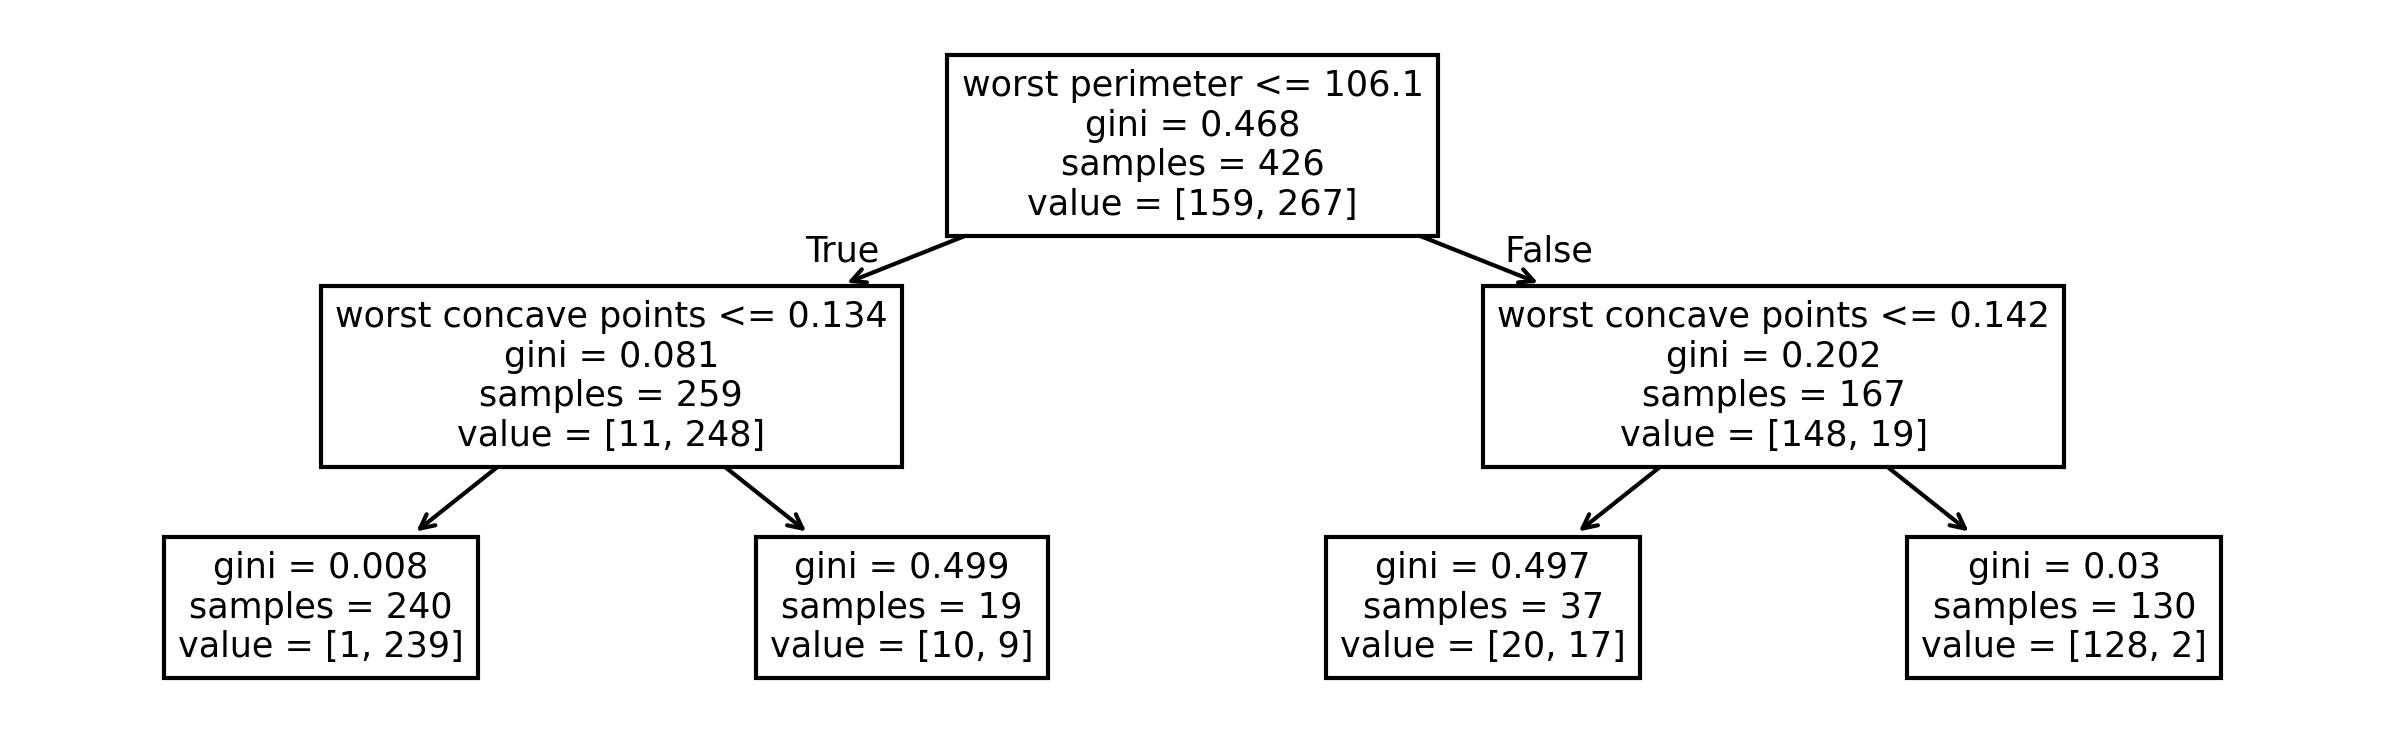

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names)


# Parameter Tuning

* Limit tree size (pick one, maybe two):

    1. max_depth

    2. max_leaf_nodes

    3. min_samples_split

    4. min_impurity_decrease

# No Pruning

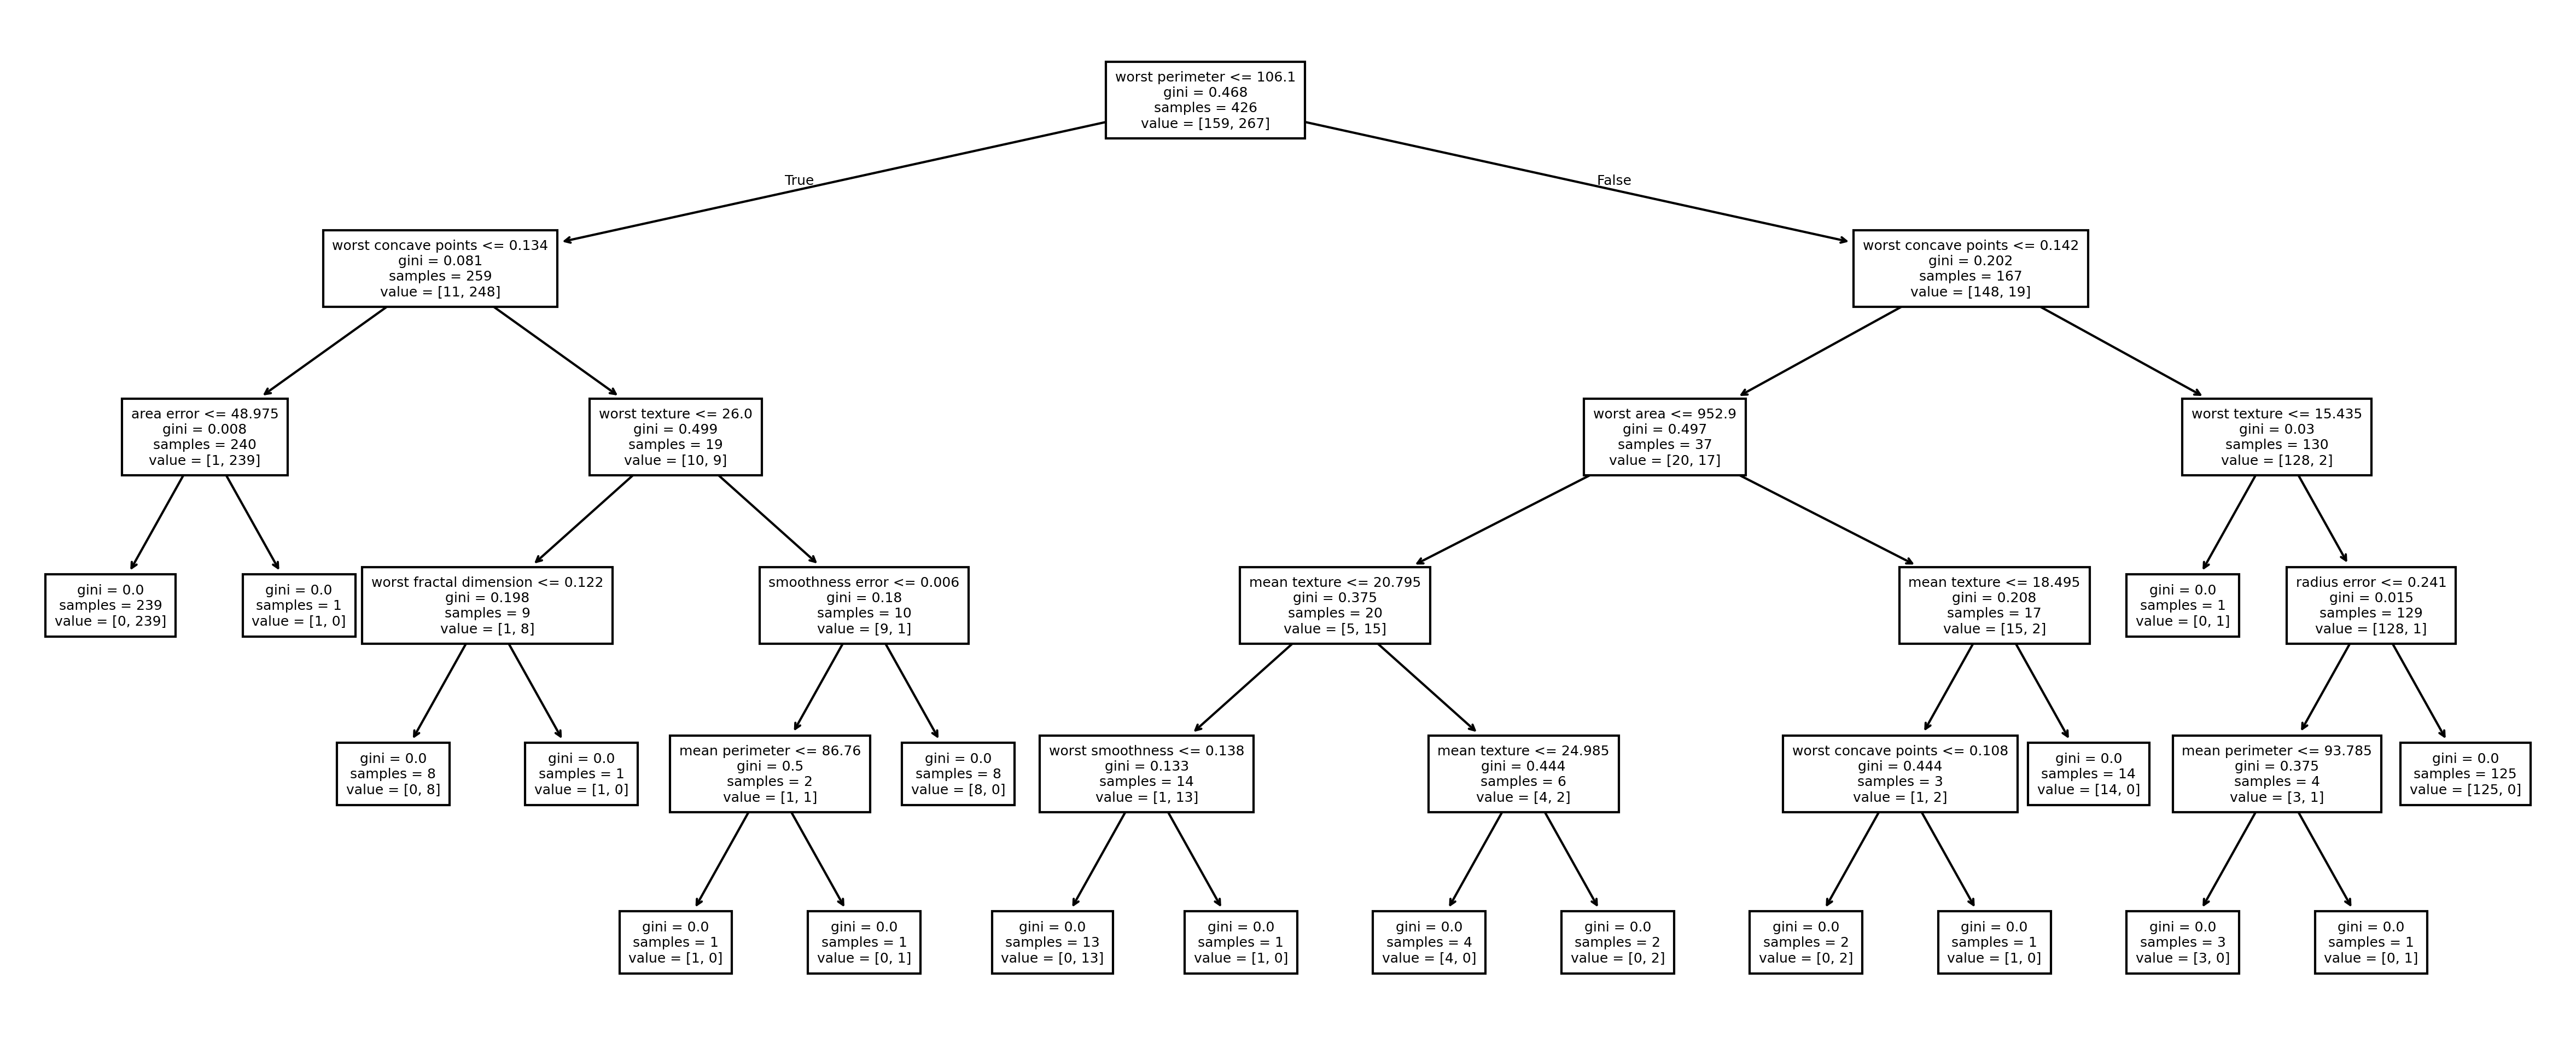

In [19]:
tree_noPrune = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(20, 8), dpi=300)
tree_dot = plot_tree(tree_noPrune, feature_names=cancer.feature_names, fontsize=6)

# max_depth = 4

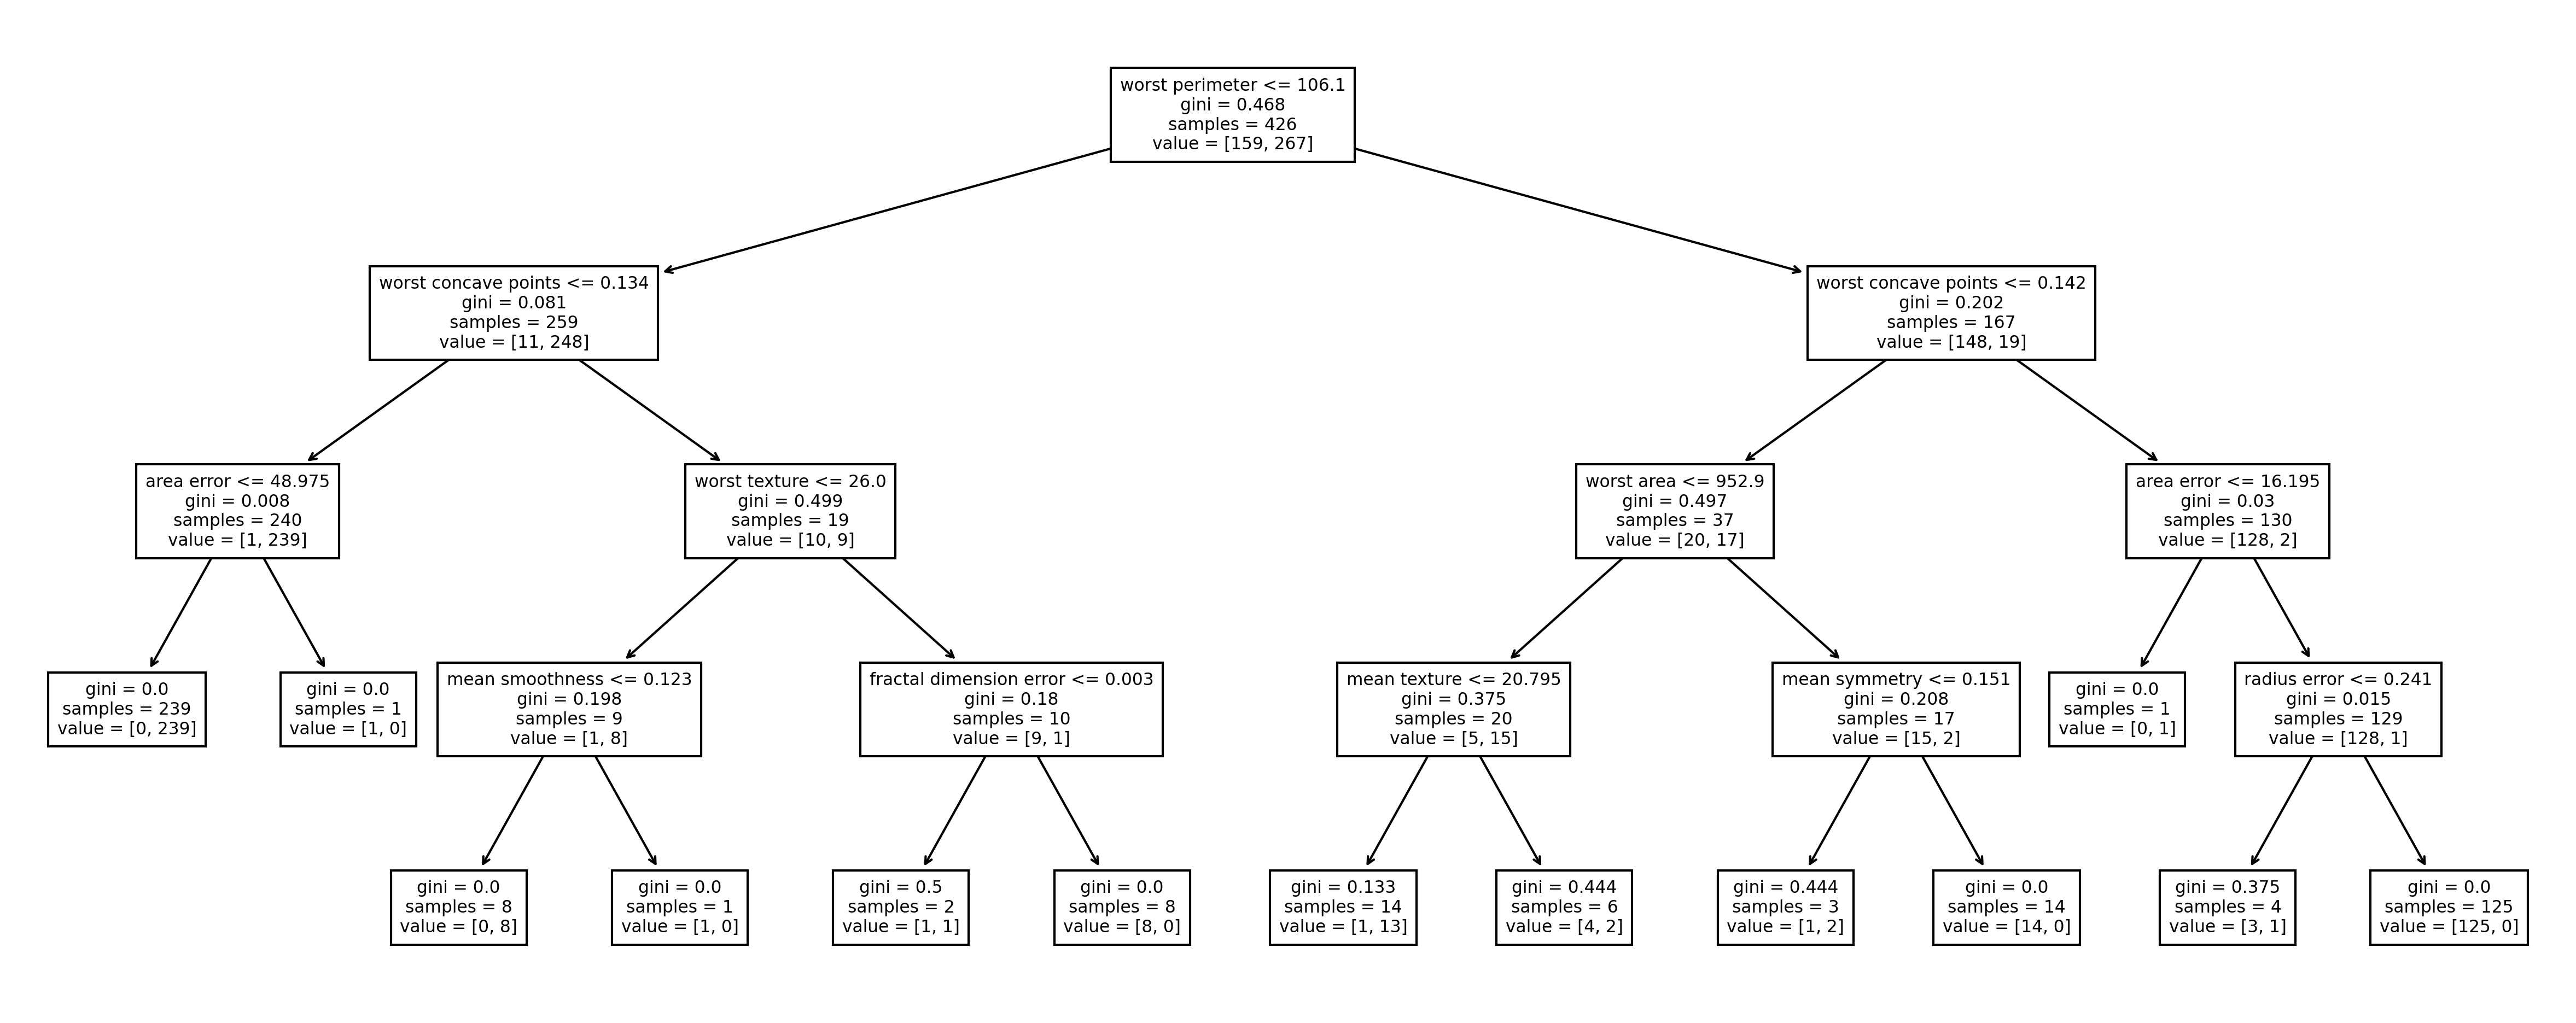

In [8]:
tree_maxDepth4 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
plt.figure(figsize=(20, 8), dpi=300)
tree_dot = plot_tree(tree_maxDepth4, feature_names=cancer.feature_names, fontsize=7.5)

# max_leaf_nodes = 8

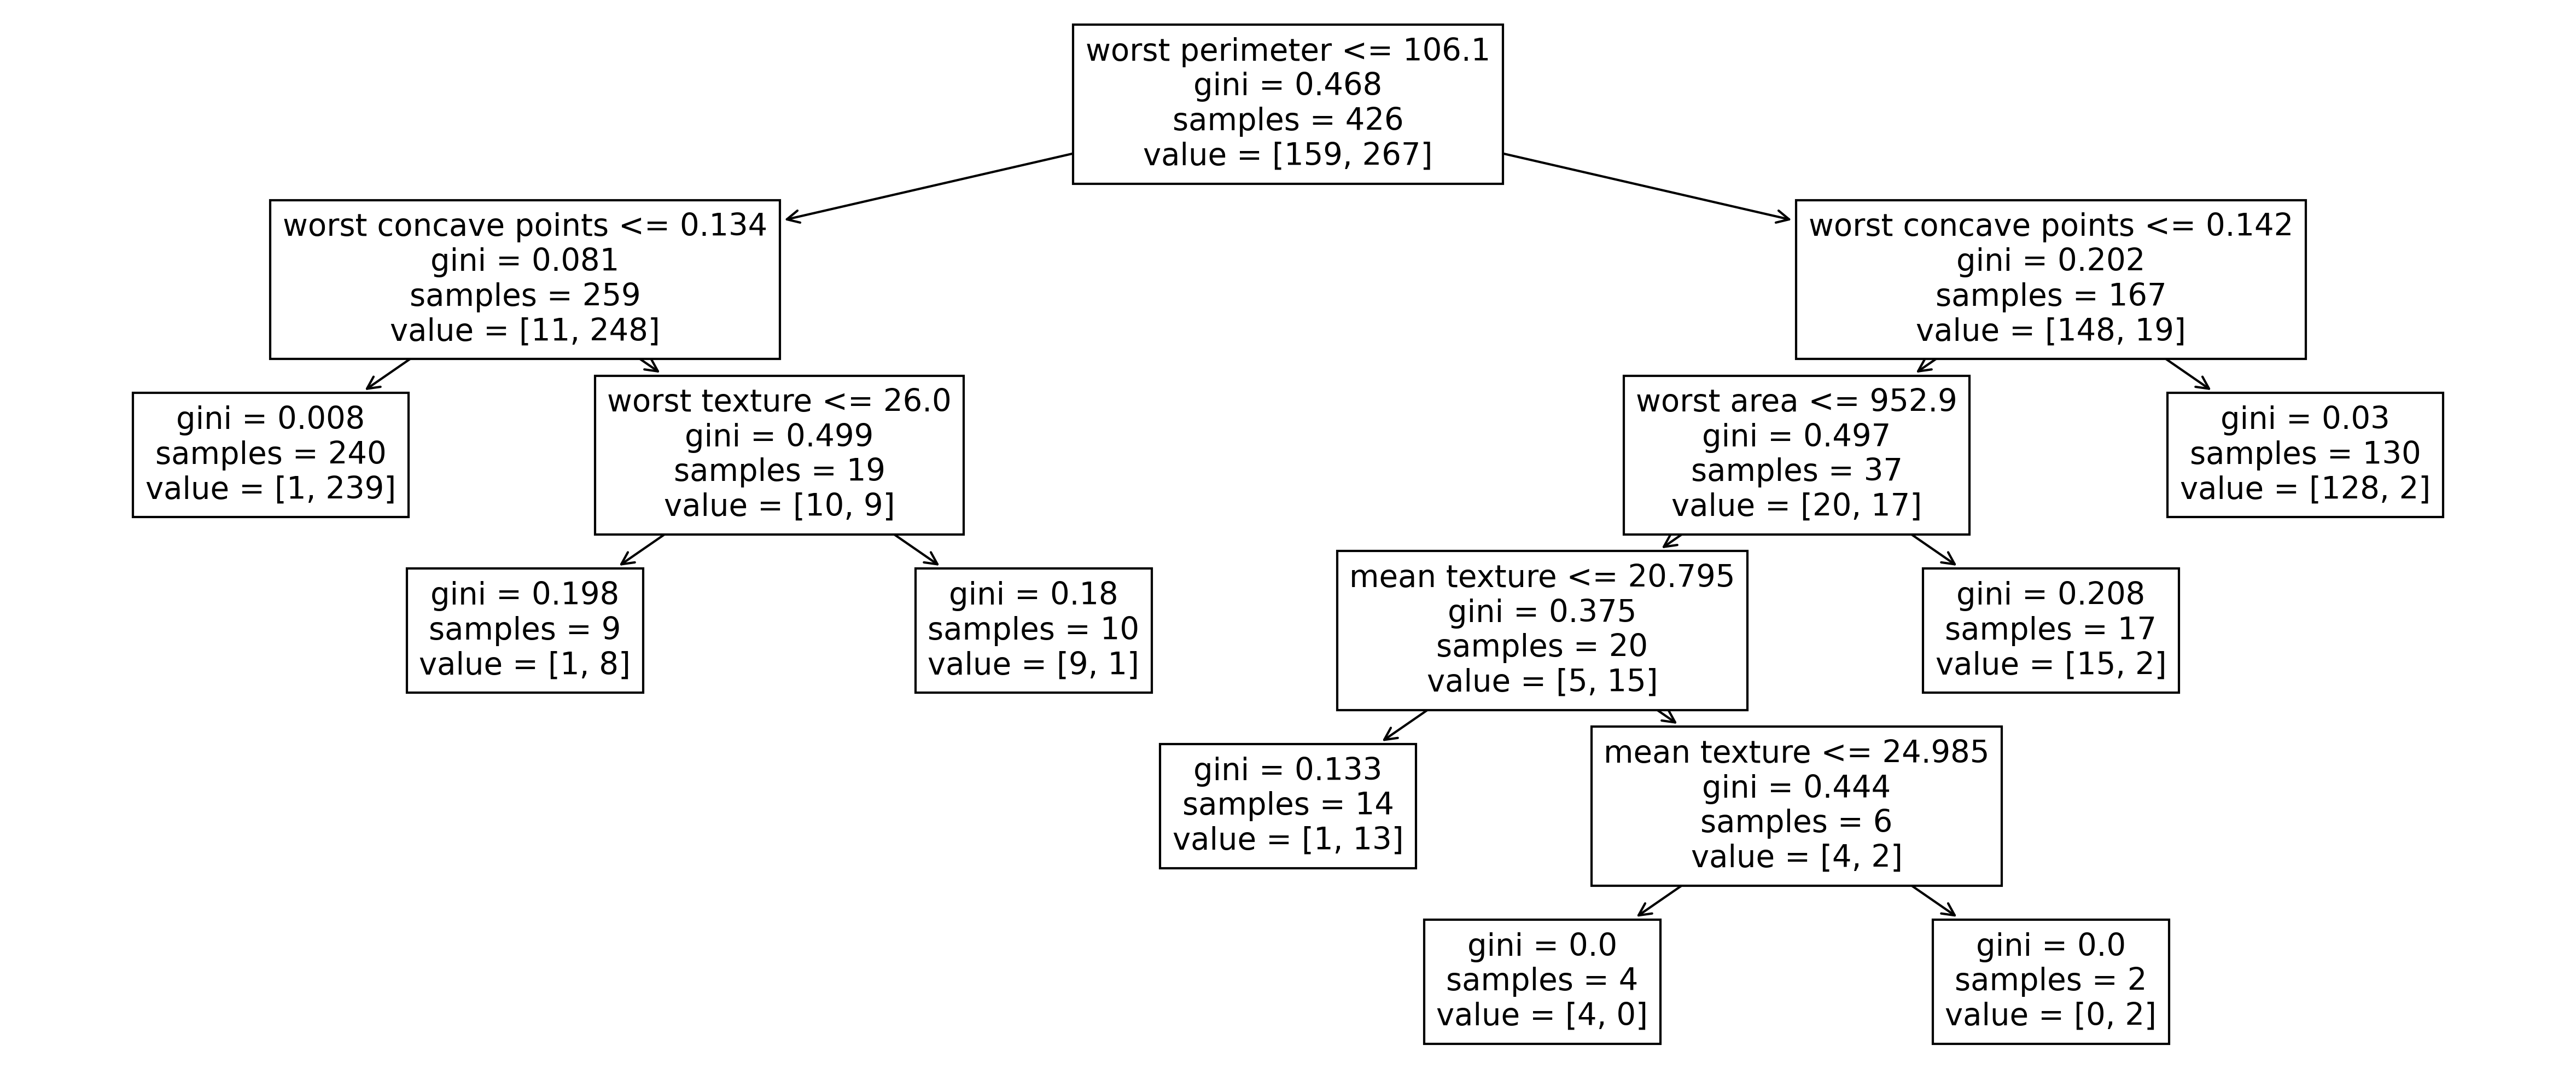

In [25]:
tree_maxLeaf8 = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
plt.figure(figsize=(20, 8.5), dpi=300)
tree_dot = plot_tree(tree_maxLeaf8, feature_names=cancer.feature_names)

# min_samples_split = 50

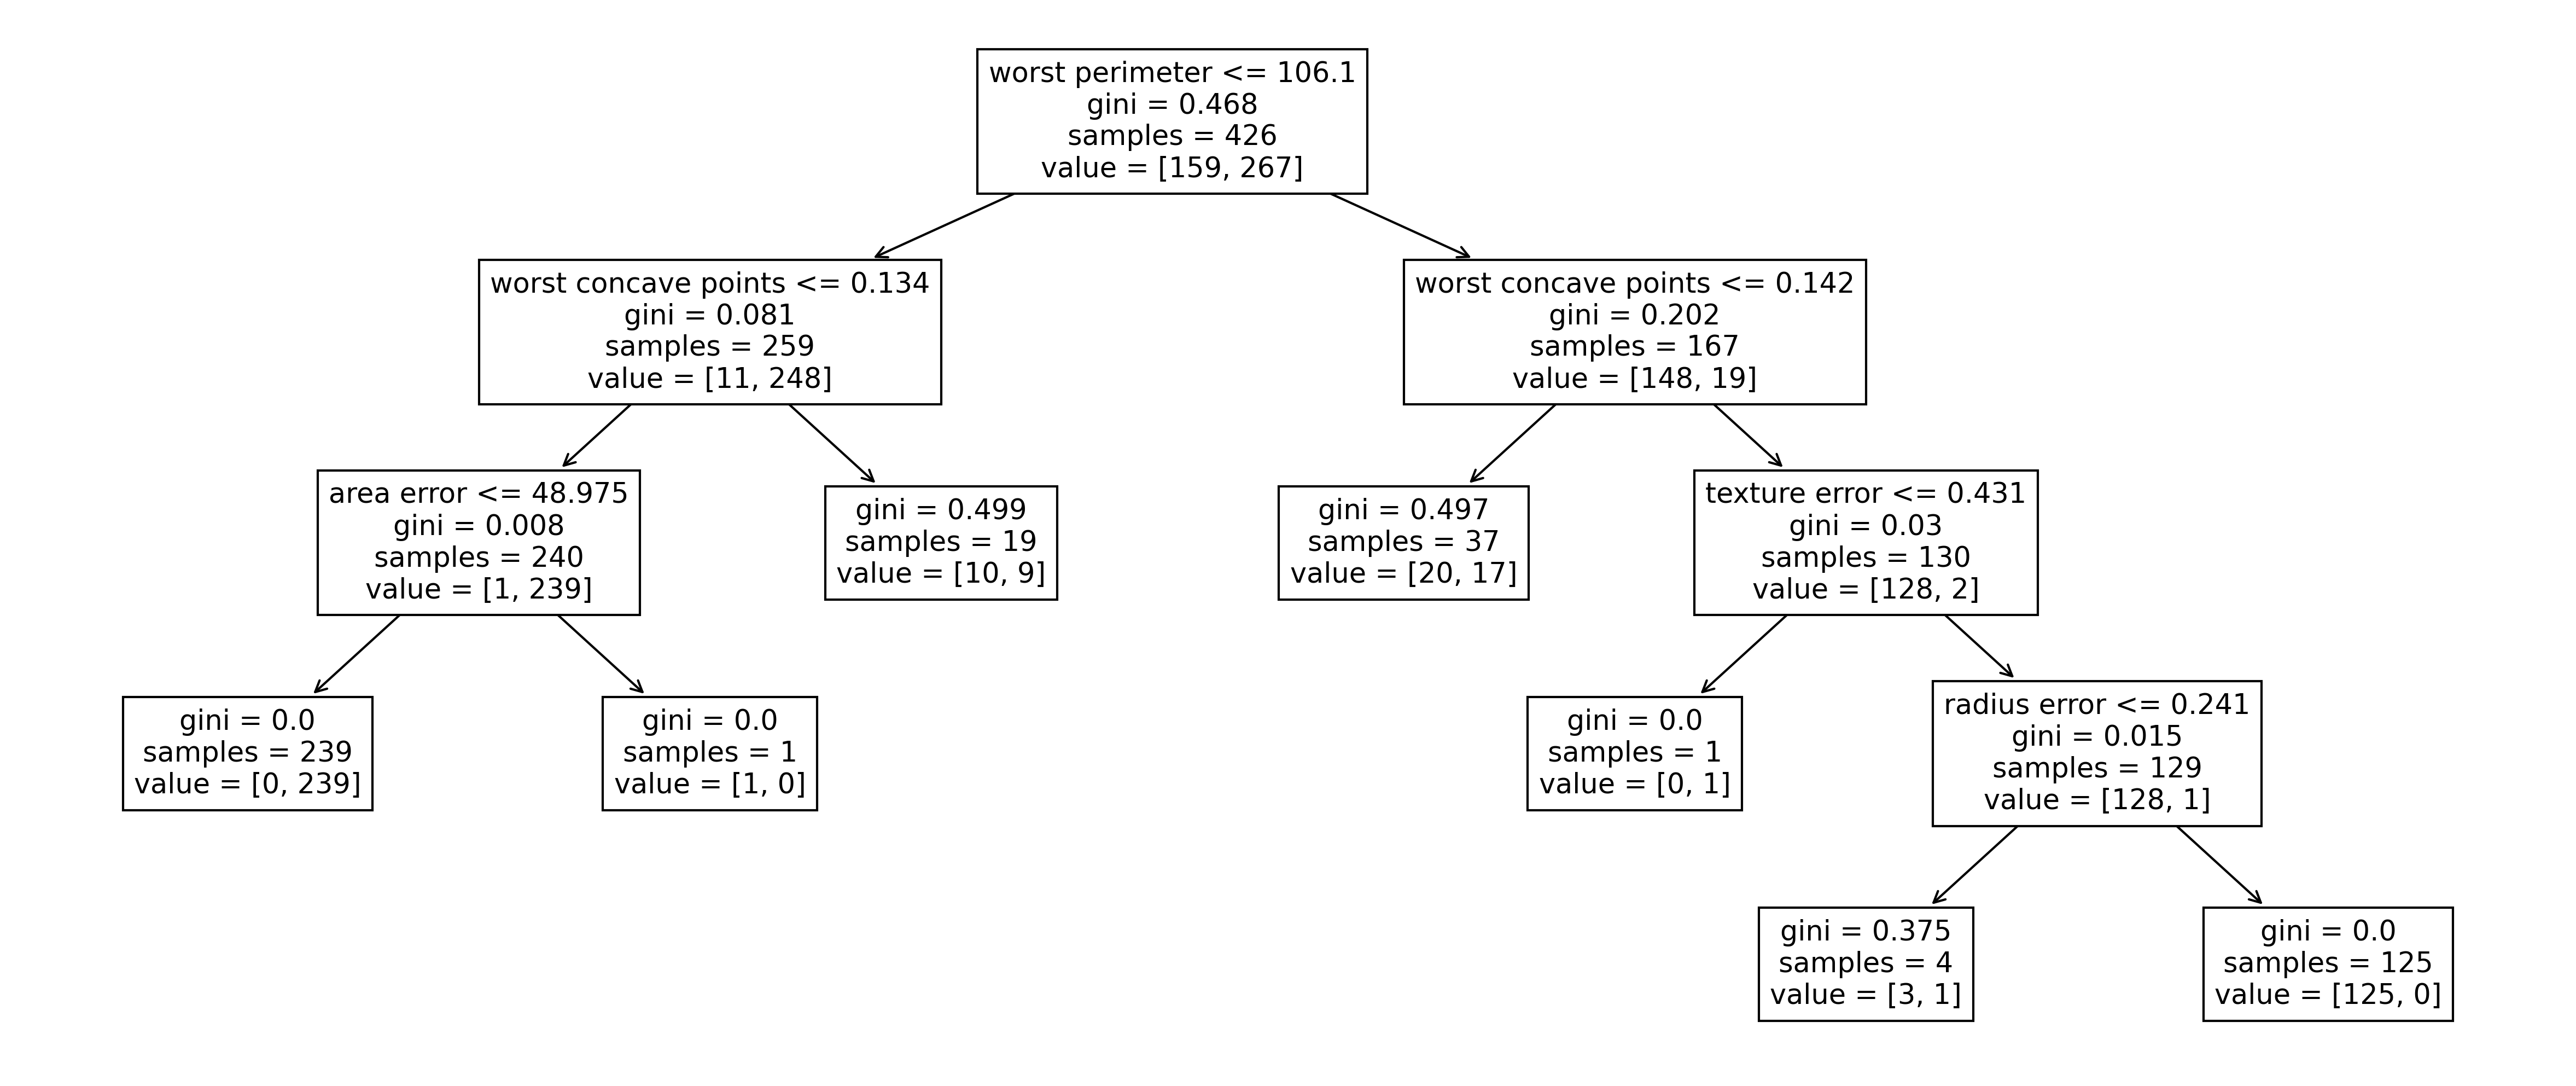

In [10]:
tree_minSplit50 = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
plt.figure(figsize=(20, 8.5), dpi=300)
tree_dot = plot_tree(tree_minSplit50, feature_names=cancer.feature_names)

### Parameters Tuning Using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
# Please find the optimum "max_depth" parameter using GridSearch.You may try values between 1-10 for "max_depth" parameter.
# You may also create a pandas dataframe from the output of the "grid.cv_results_" and save it as "scores"!
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1,11)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)



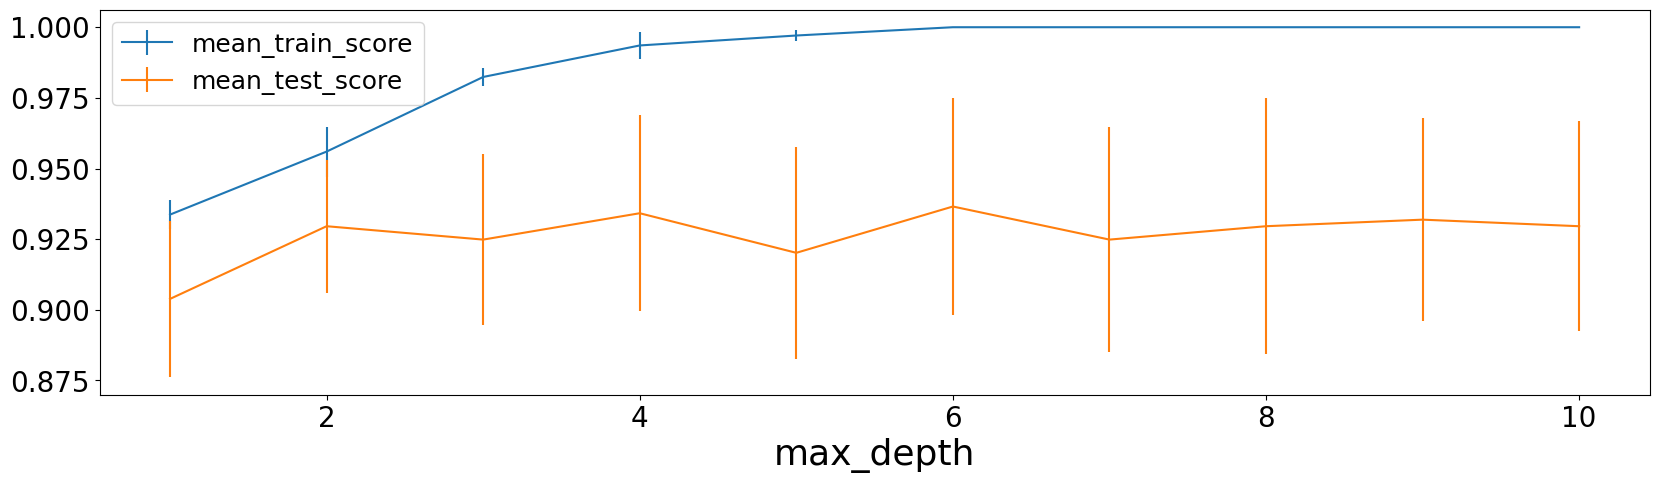

In [26]:
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca(), figsize=(20,5))
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca(), figsize=(20,5))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('max_depth', fontsize=26)
plt.legend(fontsize=18)

# Feature Importance

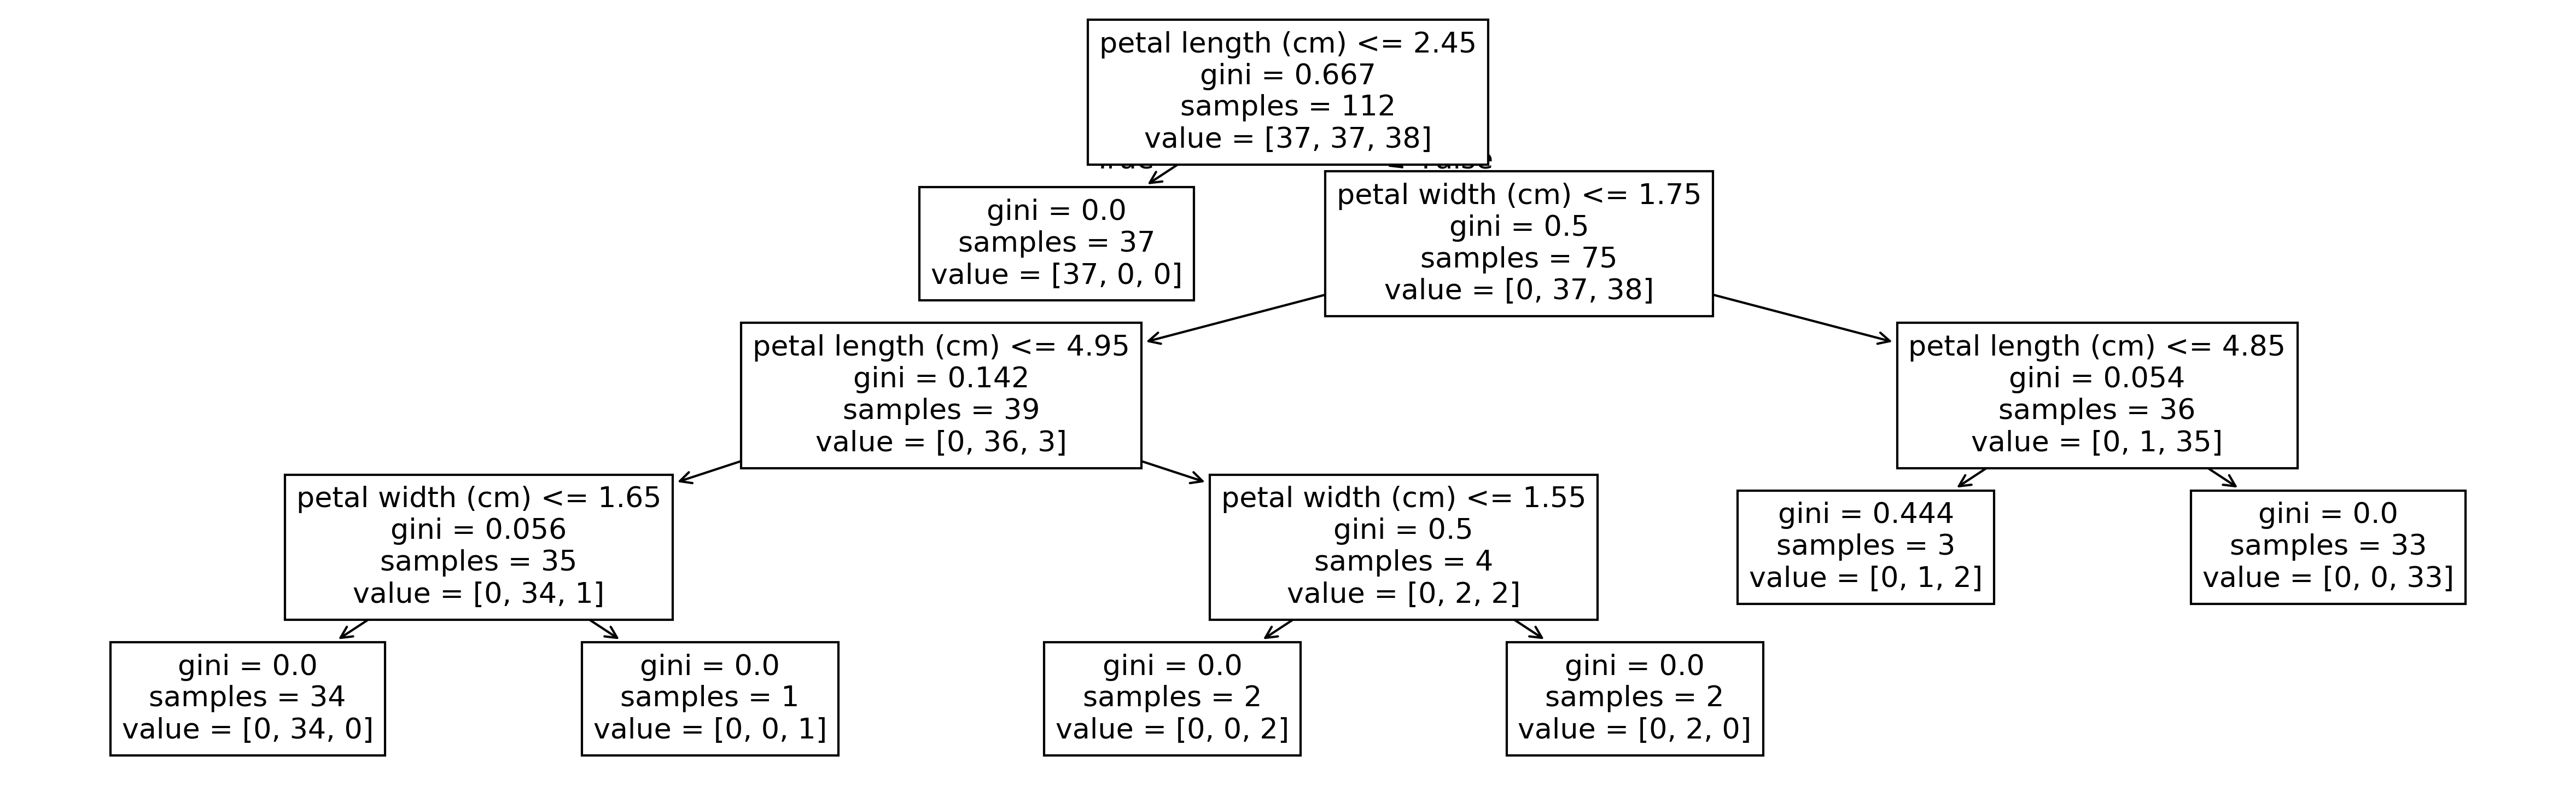

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)
tree_opt = DecisionTreeClassifier(max_leaf_nodes=7).fit(X_train, y_train)
plt.figure(figsize=(20, 6), dpi=300)
tree_dot = plot_tree(tree_opt, feature_names=iris.feature_names)

# Plotting Feature Importance

In [30]:
tree_opt.feature_importances_

array([0.008, 0.   , 0.022, 0.97 ])

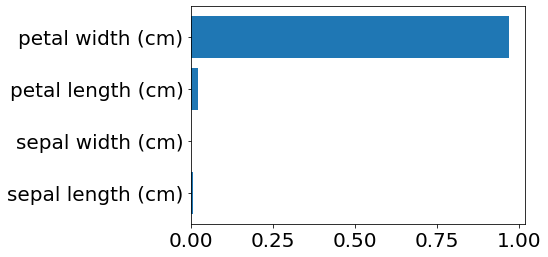

In [16]:
plt.barh(range(4), tree_opt.feature_importances_)
plt.yticks(range(4), iris.feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Random Forests

* Decision trees are easy to build, use, and interpret. 
* But in practice they have some drawbacks.

"Decision trees have one aspect that prevents them from being the ideal tool for predictive learning, namely **inaccuracy**." (from the book **The Elements of Statistical Learning**)

* In other words, they work great with the data used to create them, **but they are not flexible when it comes to classifying new samples**

The good news is that **Random Forests** combine the simplicity of decision trees with flexibility resulting in a vast improvement in accuracy.
<div>
<center>
<img src="img/quest/Qimage-67.jpg" width="1000"/>
</div>

#### So let's make a Random Forest!

# 1. Create a "boorstrapped" dataset

* Imagine that these 4 samples are the entire datatset that we are going to build a tree from.
* To create a bootstrapped dataset that is the **same size as the original dataset**, we just **randomly select samples** from the original dataset.
* It is important that we are allowed to pick samples more than once.

<div>
<center>
<table><tr>
<td>
    


Original Dataset
    
<img src="img/quest/Qimage-68.jpg" width="400"/>

</td>
<td>
    
Bootstrapped Dataset
    
<img src="img/quest/Qimage-69.jpg" width="400"/>
    
</td>
</tr></table>

# 2. Create a Decision Tree

* Create a decision tree using the bootstrapped dataset.
* But only use a random subset of variables (**columns**) at each step.

* In the example below, we will only consider 2 variables (columns) at each step.
* **NOTE:** We will talk more about how to determine the optimal number of variables to consider later!
* The **Good Blood Circulation** and **Blocked Arteries** are randomly selected as candidates for the root node.
<div>
<center>
<img src="img/quest/Qimage-70.jpg" width="700"/>
</div>

* So, let's assume that **Good Blood Circulation** is selected as root node.
* Now we need to figure out how to split samples at this point.
* Again, we randomly select 2 variables, instead of all 3 remaining columns.

<div>
<center>
<img src="img/quest/Qimage-71.jpg" width="800"/>
</div>

So we just create the tree as usual but only using 2 variables at each step. 
<div>
<center>
<img src="img/quest/Qimage-72.jpg" width="1000"/>
</div>

Horray...<br>
We built a tree:
 1. Using a bootstrapped dataset.
 2. Only considering a random subset of variables at each step.

#### Now go back to step 1 and repeat

<div>
<center>
<img src="img/quest/Qimage-73.jpg" width="1000"/>
</div>

* Ideally, you do this 100's of time, but we only showed 6 of them here!
* Using a bootstrapped sample and considering only a subset of the variables at each step results in a wide variety of trees.
* **Variety** is what makes Random Forests more effective than individula trees.

### Quiz 1
In Random forest you can generate hundreds of trees (say T1, T2 …..Tn) and then aggregate the results of these tree. Which of the following is true about individual(Tk) tree in Random Forest?

1. Individual tree is built on a subset of the features
2. Individual tree is built on all the features
3. Individual tree is built on a subset of observations
4. Individual tree is built on full set of observations

A) 1 and 3 <br>
B) 1 and 4 <br>
C) 2 and 3 <br>
D) 2 and 4 

Please answer here: https://PollEv.com/multiple_choice_polls/r7pNVeNQDnxVLokDDxCU9/respond


# How to use Random Forsts

* Assume that we have got a new patient. We have all the measurements and we want to know if they have a heart disease or not?

<div>
<center>
<img src="img/quest/Qimage-74.jpg" width="380"/>
</div>

* We take the data and apply it to the first tree that we have made!
<div>
<center>
<img src="img/quest/Qimage-75.jpg" width="600"/>
    
The first tree says **YES**

* Now we use the second tree that we have made.
<div>
<center>
<img src="img/quest/Qimage-76.jpg" width="600"/>
    
The second tree also says **YES**

* We repeat for all the trees that we have made!
* At the end we get **5 YES** and **1 NO**. 
* So the patient has heart disease.

**NOTE:** **B**ootstrapping the data plus using the **agg**regating to make a decision is called **Bagging**.

# Quiz 2

Which of the following is/are true about bagging trees?

1. In bagging trees, individual trees are independent of each other
2. Bagging is the method for improving the performance by aggregating the results of weak learners

A) 1 <br>
B) 2 <br>
C) 1 and 2<br>
D) None of these

Please answer here: https://PollEv.com/multiple_choice_polls/thdfvFA68RTHDeUjzR2PE/respond

# How do we know if our Random Forests is good?

<div>
<center>
<table><tr>
<td>
   
Original Dataset
    
<img src="img/quest/Qimage-77.jpg" width="300"/>

</td>
<td>
    
Bootstrapped Dataset
    
<img src="img/quest/Qimage-69.jpg" width="300"/>
    
</td>
</tr></table>

* The highlighted entry was not included in the bootstrapped dataset.
* Typically, about 1/3 of the original data does not end up in the bootstrapped dataset.
<div>
<center>
<img src="img/quest/Qimage-78.jpg" width="400"/>

This is called the **Out-Of-Bag Dataset**

So, we can use the **Out-Of-Bag** data to test the Random Forests.
<div>
<center>
<img src="img/quest/Qimage-79.jpg" width="700"/>

We run the Out-Of-Bag sample through all of the other trees that were built without it...
<div>
<img src="img/quest/Qimage-80.jpg" width="700"/>
    
* 3 trees say **NO** to Out-Of-Bag sample and 1 says **YES**
* So the the Out-Of-Bag sample classified correctly as **NO**


* We repeat the previous procedure for **all** the Out-Of-Bag samples
* Ultimately, we can measure how accurate our random forest is by the proportion of Out-Of-Bag samples that were correctly classified.
* The proportion of Out-Of-Bag samples that were incorrectly classified is the **Out-Of-Bag Error**

OK, we now know how to:
   1. Build a Random Forest
   2. Use a Random Forest
   3. Estimate the accuracy of a Random Forest

## Tuning Random Forests

* Main parameter: max_features
 1. around sqrt(n_features) for classification
 2. Around n_features for regression
* n_estimators > 100
* Prepruning might help, definitely helps with model size!
* max_depth, max_leaf_nodes, min_samples_split again

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)


In [29]:
train_scores = []
test_scores = []
rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

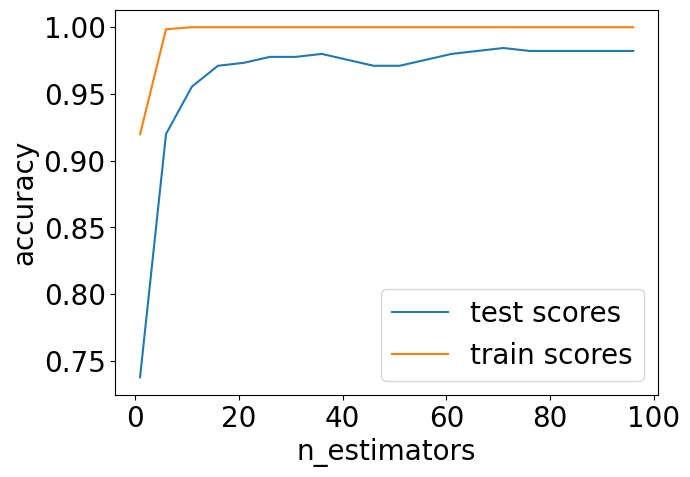

In [30]:
plt.figure(figsize=(7,5))
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy", fontsize=20)
plt.xlabel("n_estimators", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)

# Out-of-bag estimates

* Each tree only uses ~66% of data
* Can evaluate it on the rest!
* Make predictions for out-of-bag, average, score.
* Each prediction is an average over different subset of trees

In [31]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)
    

Text(0.5, 0, 'max_features')

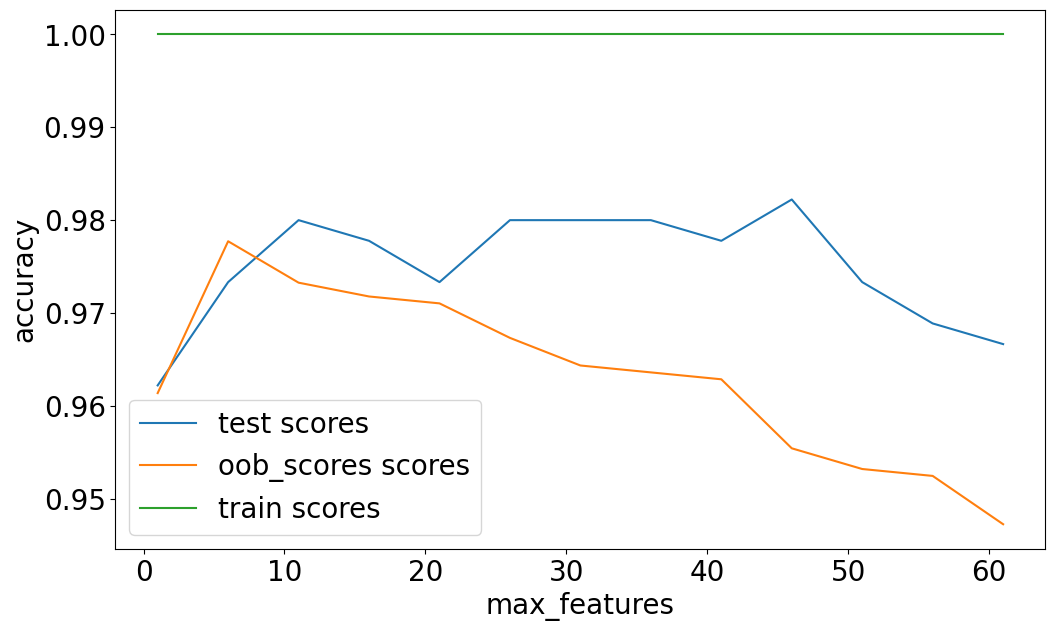

In [32]:
plt.figure(figsize=(12,7))
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend(fontsize=20, loc='best')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.xlabel("max_features", fontsize=20)

# Variable Importance

In [35]:

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [36]:
rf.feature_importances_

array([0.149, 0.035, 0.419, 0.397])

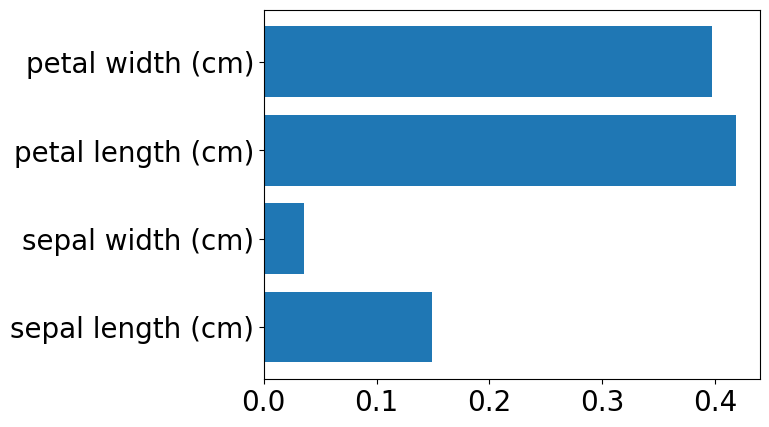

In [37]:
plt.barh(range(4), rf.feature_importances_)
plt.yticks(range(4), iris.feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Notes on Ensemble Learning

* Build different models
* Average the result
* More models are better – if they are not correlated.
* You can average any models as long as they provide calibrated (“good”) probabilities.
* Scikit-learn: VotingClassifier hard and soft voting

1. It has been shown that generalization depends on strength of the individual classifiers and (inversely) on their correlation
2. Uncorrelating them might help, even at the expense of strength

# VotingClassifier

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=18)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)), 
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))], 
                          voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_

In [18]:
print(("{:.2f} " * 3).format(voting.score(X_test, y_test),
                             lr.score(X_test, y_test), 
                             tree.score(X_test, y_test)))

0.88 0.84 0.80 


<font size="25"><center>Thank you!